# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

## 读取数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv("Penguins.csv")
original_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## 评估和清理数据

In [3]:
cleaned_data = original_data.copy()

In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


从输出结果来看，cleaned_data数据共有344条观察值，culmen_length_mm、culmen_depth_mm、flipper_length_mm、body_mass_g变量存在缺失值，将在后续进行评估和清理。

数据类型方面，我们已知species（企鹅种类）sex（企鹅性别）、island（企鹅所在岛）都是分类数据，因此可以把数据类型都转换为Category。

In [6]:
cleaned_data['species'] = cleaned_data['species'].astype("category")
cleaned_data['sex'] = cleaned_data['sex'].astype("category")
cleaned_data['island'] = cleaned_data['island'].astype("category")

In [7]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


In [8]:
cleaned_data.query("culmen_length_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [10]:
cleaned_data.query('culmen_depth_mm.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [11]:
cleaned_data.query('flipper_length_mm.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [12]:
cleaned_data.query('body_mass_g.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [13]:
cleaned_data.drop(3, inplace=True)
cleaned_data.drop(339, inplace=True)

In [14]:
cleaned_data["species"].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [15]:
cleaned_data["island"].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [16]:
cleaned_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [18]:
cleaned_data['sex'] = cleaned_data['sex'].replace(".", np.nan)

In [19]:
cleaned_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## 探索数据

In [20]:
sns.set_palette("pastel")

In [21]:
cleaned_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### 企鹅种类比例

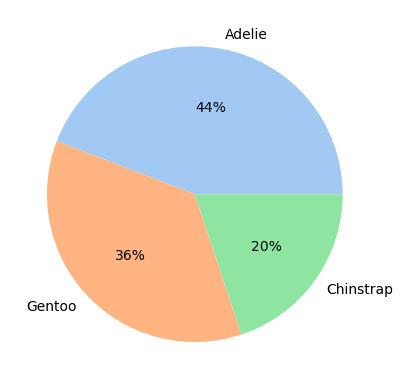

In [24]:
species_count = cleaned_data["species"].value_counts()
plt.pie(species_count,autopct='%.0f%%',labels=species_count.index)
plt.show()

### 企鹅所属岛屿比例

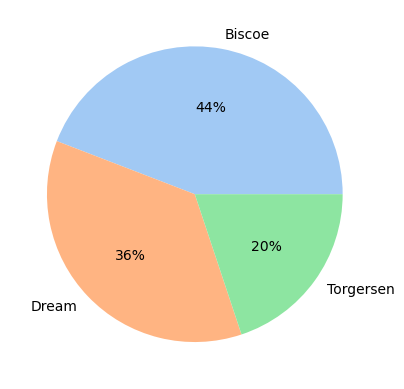

In [25]:
island_count = cleaned_data["island"].value_counts()
plt.pie(species_count,autopct='%.0f%%',labels=island_count.index)
plt.show()

### 不同岛上的企鹅种类数量

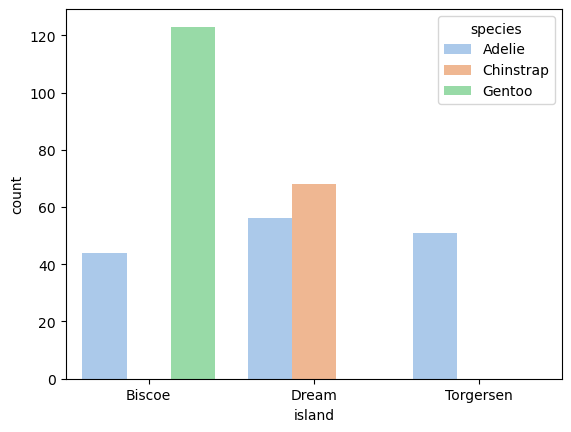

In [26]:
sns.countplot(cleaned_data, x="island", hue="species")
plt.show()

从以上可以看出，Adelie种类的企鹅样本在Biscoe、Dream、Torgersen这三个岛上都有，而Chinstrap种类只在Dream岛上才有，Gentoo只在Biscoe岛上才有。

### 不同岛屿上的企鹅性别数量

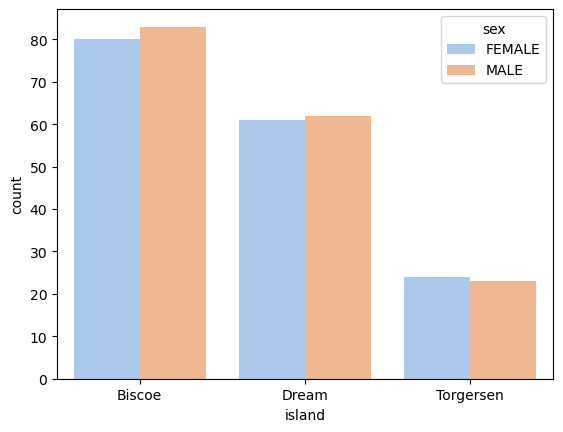

In [27]:
sns.countplot(cleaned_data, x="island", hue="sex")
plt.show()

### 数值之间的相关关系

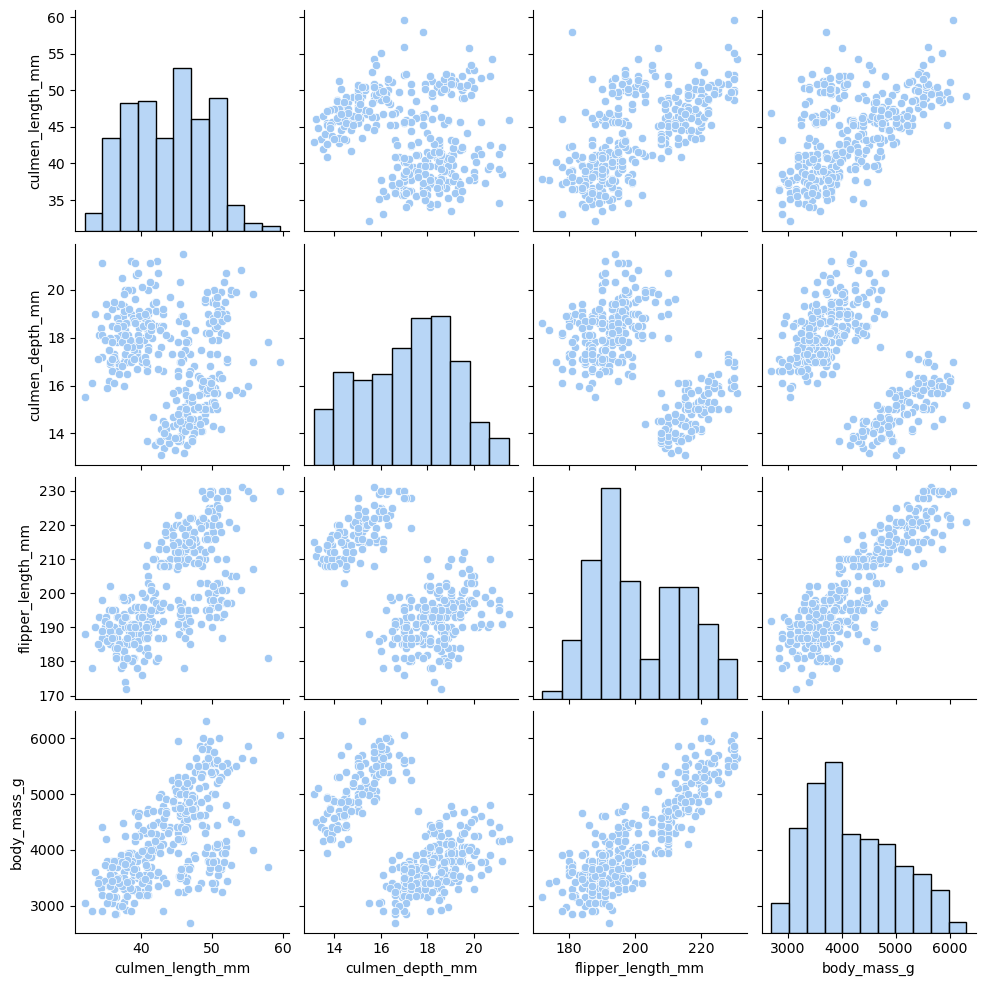

In [28]:
sns.pairplot(cleaned_data)
plt.show()

从直方图来看，企鹅样本的嘴峰长度、嘴峰深度、鳍长度、体重的分布不是正态分布。一方面说明，这里面可能包含了多组存在差异的样本数据，另一方面也说明样本数不够大。

另外可以在散点图中看出明显的多个集群，可能与某些因素有关，比如企鹅种类、性别，因此可以对对比进行进一步的分类。

### 根据种类查看数值之间的相关关系

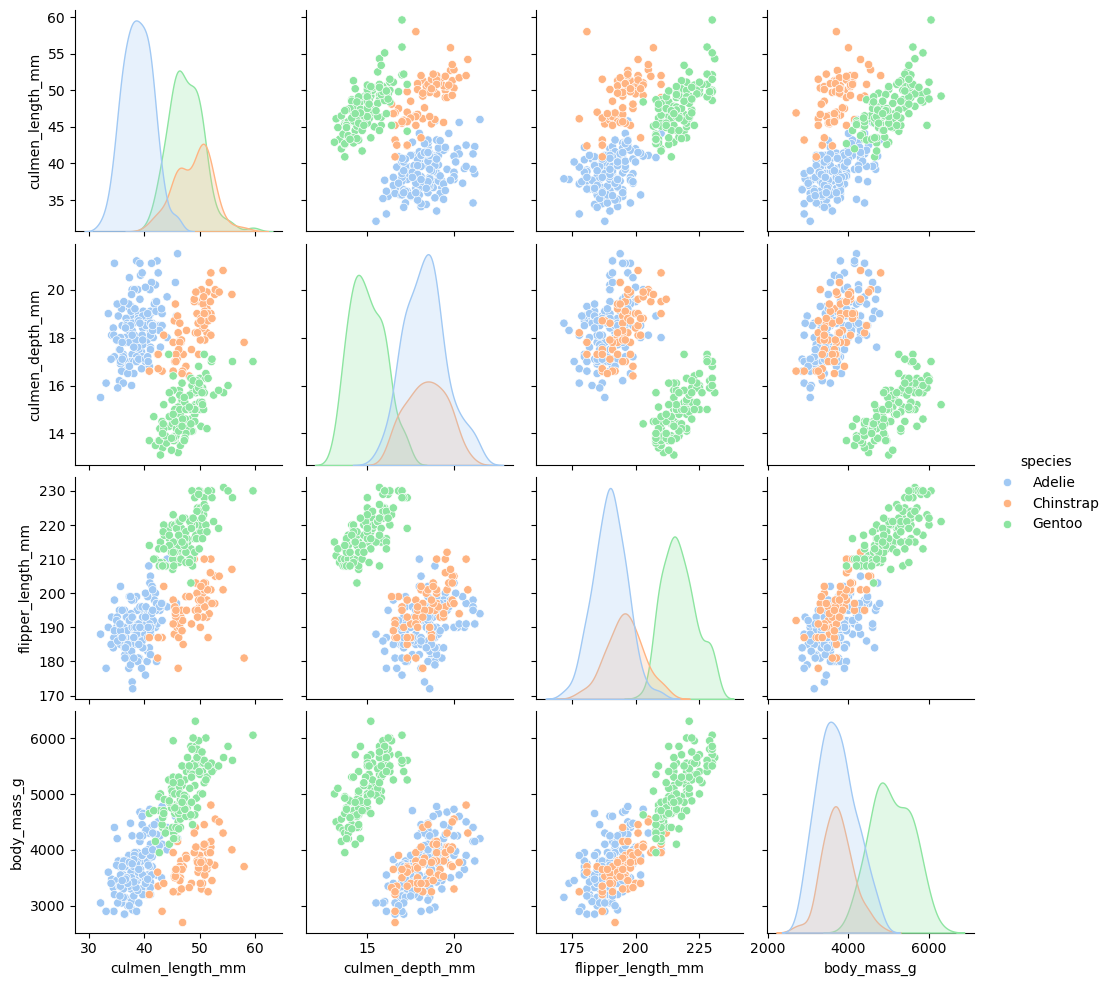

In [32]:
sns.pairplot(cleaned_data,hue="species")
plt.show()

同一种类的企鹅样本数据，在散点图上基本都聚在一起，说明同一种类的企鹅在嘴峰长度、嘴峰深度、鳍长度、体重之间关系上，存在相似性。这些发现有利于我们根据体重、鳍长等数值推测企鹅种类，也可以根据企鹅种类推测体重、鳍长等数值。